In [1]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image
import cv2


%matplotlib inline


#이미지 호출에 따른 흑백 또는 컬러로 출력
def imshow(tit,image):
    plt.title(tit)
    if len(image.shape) == 3: #행렬의 크기가 나옴, 컬러영상일경우 3이 나옴
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else: # 흑백영상일 경우 2가 나옴
        plt.imshow(image, cmap='gray')
    plt.show()

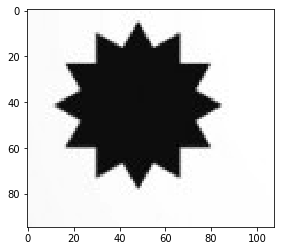

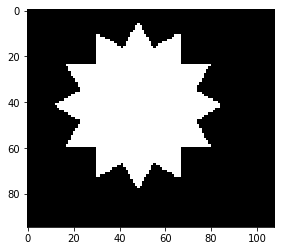

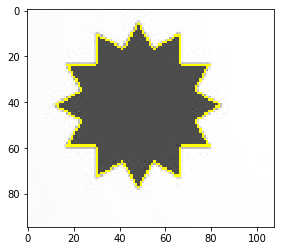

In [2]:
#그림에 꼭지점 그리기

#바이너리화
img = cv2.imread('./data/shape5.png',0) #노이즈로 인해 엣지가 너무 많음
_,binary = cv2.threshold(img, 0, 255 , cv2.THRESH_BINARY + cv2.THRESH_OTSU) # 역치값이 작다는 것은, 구분이 잘 된다는 뜻이다., 색의 전경과 배경의 명암대비에 따라 달라짐
imshow('', img)

#이미지 반전
binary = 255 -binary

imshow('',binary)

#바운더리(꼭지점?) 찾기
countours, _ = cv2.findContours(binary,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#print(countours)

#꼭지점 그림에 표시해주기
img = cv2.imread('./data/shape5.png')
cv2.drawContours(img, countours, -1, (0, 255, 255), 1) # -1은 찾아진 꼭지점 전부 색칠,  맨뒤 값은 꼭지점굵기
imshow('',img)

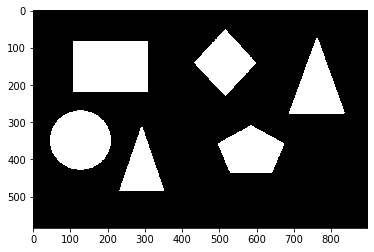

전체 도형 shpae = 6
shape=240  length=513.7056245803833 approx=3
shape=300  length=515.9310202598572 approx=5
shape=226  length=531.8721435070038 approx=8
shape=4  length=672.0 approx=4
shape=298  length=616.7178171873093 approx=3
shape=56  length=493.0336227416992 approx=4


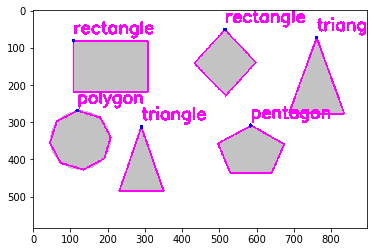

In [126]:
#바이너리화
img = cv2.imread('./data/shape3.png') #노이즈로 인해 엣지가 너무 많음
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thr,mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # 역치값이 작다는 것은, 구분이 잘 된다는 뜻이다., 색의 전경과 배경의 명암대비에 따라 달라짐
mask = 255 - mask
imshow('', mask)

#바운더리(꼭지점?) 찾기
contours, _ = cv2.findContours(mask,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#print(countours)

print( f"전체 도형 shpae = {len(contours)}")
for con in contours:
    x = con[0][0][0]
    y = con[0][0][1]
    peri = cv2.arcLength(con,True)
    approx = cv2.approxPolyDP(con, 0.02*peri, True)
    
    print(f"shape={len(con)}  length={peri} approx={len(approx)}"   )
    
    if len(approx) == 3:
        cv2.putText(img, 'triangle', (x,y-20), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 255) , 5) 
    
    elif len(approx) == 4 :
        cv2.putText(img, 'rectangle', (x,y-20), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 255) , 5) 
    
    elif len(approx) == 5:
        cv2.putText(img, 'pentagon', (x,y-20), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 255) , 5) 
    
    elif len(approx) > 5:
        cv2.putText(img, 'polygon', (x,y-20), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 255) , 5) 
    
    #꼭지점 그림에 표시해주기
    cv2.drawContours(img, [approx], -1, (255, 0, 255), 3) #두번째 배열처럼 넣어줘야함
    cv2.circle(img, (x,y),5 ,(255,0,0), -1) #중심점, 반지름 크기, 색깔, 굵기



imshow('',img)

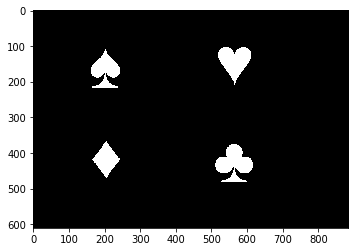

전체 도형 shpae = 4
shape=222  length=561.0020878314972 approx=22
shape=113  length=273.7888822555542 approx=4
shape=165  length=473.00208842754364 approx=16
shape=173  length=349.0609620809555 approx=12


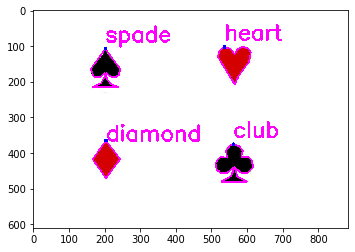

In [125]:
#트럼프 카드

#바이너리화
img = cv2.imread('./data/card.jpg') #노이즈로 인해 엣지가 너무 많음
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thr,mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # 역치값이 작다는 것은, 구분이 잘 된다는 뜻이다., 색의 전경과 배경의 명암대비에 따라 달라짐
mask = 255 - mask
imshow('', mask)

#바운더리(꼭지점?) 찾기
contours, _ = cv2.findContours(mask,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#print(contours)
print( f"전체 도형 shpae = {len(contours)}")

for con in contours:
    x = con[0][0][0]
    y = con[0][0][1]
    peri = cv2.arcLength(con,True)
    approx = cv2.approxPolyDP(con, 0.009*peri, True)
    
    print(f"shape={len(con)}  length={peri} approx={len(approx)}"   )
    
    if len(approx) == 4:
        cv2.putText(img, 'diamond', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 255) , 5) 
    
    elif len(approx) == 12 :
        cv2.putText(img, 'heart', (x,y-20), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 255) , 5) 
    
    elif len(approx) == 16:
        cv2.putText(img, 'spade', (x,y-20), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 255) , 5) 
    
    elif len(approx) == 22:
        cv2.putText(img, 'club', (x,y-20), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 255) , 5) 
    
    #꼭지점 그림에 표시해주기
    cv2.drawContours(img, [approx], -1, (255, 0, 255), 3) #두번째 배열처럼 넣어줘야함
    cv2.circle(img, (x,y),5 ,(255,0,0), -1) #중심점, 반지름 크기, 색깔, 굵기



imshow('',img)